In [1]:
!pip install --upgrade pandas
!pip install symbulate
!pip install --upgrade pandas_datareader
import pandas_datareader as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

In [3]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.4529829077644159

In [4]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.14957620399223484

In [5]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.452982907764416, pvalue=0.14957620399223484)

In [7]:
!pip install researchpy
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.032447  0.162223  0.019819  -0.007123  0.072016
 1      INTC   67.0  0.000662  0.075799  0.009260  -0.017827  0.019151
 2  combined  134.0  0.016554  0.127141  0.010983  -0.005170  0.038279,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0318
 1       Degrees of freedom =   94.3413
 2                        t =    1.4530
 3    Two side test p value =    0.1496
 4   Difference < 0 p value =    0.9252
 5   Difference > 0 p value =    0.0748
 6                Cohen's d =    0.2510
 7                Hedge's g =    0.2496
 8            Glass's delta =    0.1959
 9              Pearson's r =    0.1479)

In [8]:
!pip install --upgrade pandas
!pip install symbulate
!pip install --upgrade pandas-datareader
!pip install yfinance
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

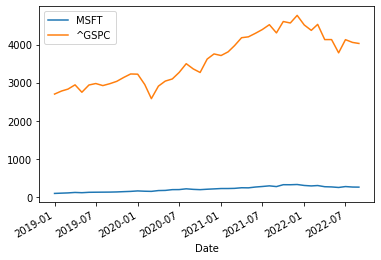

In [9]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [10]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

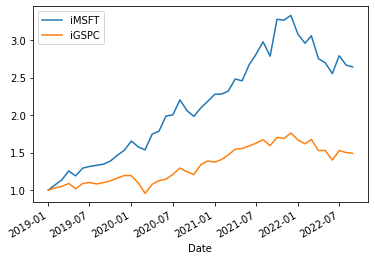

In [11]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [12]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [13]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

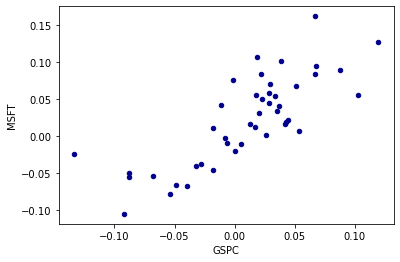

In [14]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

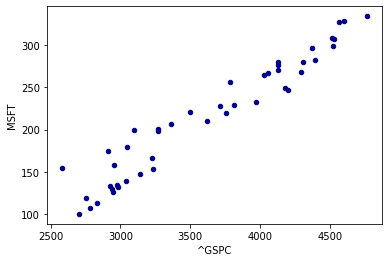

In [15]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

In [16]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr
corr[[0]]
corr[0][1]

0.7912258945745093